In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_path ="Dataset/Tweets.csv"
csv_file = pd.read_csv(csv_path)
csv_file.head()

,tweet_id,airline_sentiment,name,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.703060e+17,neutral,cairdin,@VirginAmerica What @dhepburn said.,NaN,2/24/2015 11:35,NaN,Eastern Time (US & Canada)
1,5.703010e+17,positive,jnardino,@VirginAmerica plus you've added commercials t...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
2,5.703010e+17,neutral,yvonnalynn,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/2015 11:15,Lets Play,Central Time (US & Canada)
3,5.703010e+17,negative,jnardino,@VirginAmerica it's really aggressive to blast...,NaN,2/24/2015 11:15,NaN,Pacific Time (US & Canada)
4,5.703010e+17,negative,jnardino,@VirginAmerica and it's a really big bad thing...,NaN,2/24/2015 11:14,NaN,Pacific Time (US & Canada)


In [3]:
# number of rows in this dataset
csv_file.shape

(14640, 8)

In [5]:
value_counts = csv_file["airline_sentiment"].value_counts()
value_counts

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

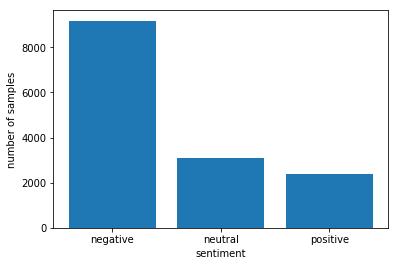

[9178, 3099, 2363]

In [19]:
classes = list(value_counts.index)
num_of_trainig_sample = list(value_counts.values)


plt.xlabel("sentiment")
plt.ylabel("number of samples")
plt.bar(classes , num_of_trainig_sample)
plt.show()

classes
num_of_trainig_sample

#### We can clearly see this data is skewed. The negative samples are more than twice the neutrak and postive samples combined. We will deal with this by an approach called **startified sampling**. Which is basically  generating batches that ensure the same number of samples in each batch.

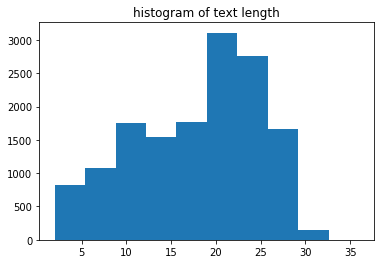

In [22]:
texts_len =[len(x.split(" ")) for x in list(csv_file["text"])]
plt.title("histogram of text length")
plt.hist(texts_len)
plt.show()

#### We can see that the max number is 36 and most of our data lies before 31. So we are going to choose a maximim word length of 31